In [214]:
import numpy
import matplotlib.pyplot as plt 
from matplotlib import cm
import pandas
import mglearn

import os
import scipy

import sklearn
import sklearn.ensemble              # import seperatley otherwise sub module won't be imported
import sklearn.neural_network        # import seperatley otherwise sub module won't be imported
from sklearn.cluster import KMeans
import sklearn.feature_selection

import graphviz
import mpl_toolkits.mplot3d as plt3dd

import time



import nltk     # language processing packages for lemmatization
import spacy 

import re

# Data represented as strings

There are four kinds of string data you might see:

- Categorical data
- Free strings that can be semantically mapped to categories
- Structured string data
- Text data

Categorical data is data that comes from a fixed list. Say you collect data via a survey where you ask people their favorite color, with a drop-down menu that allows them to select from “red,” “green,” “blue,” “yellow,” “black,” “white,” “purple,” and “pink.” This will result in a dataset with exactly eight different possible values, which clearly encode a categorical variable. You can check whether this is the case for your data by eyeballing it (if you see very many different strings it is unlikely that this is a categorical variable) and confirm it by computing the unique values over the dataset, and possibly a histogram over how often each appears. You also might want to check whether each variable actually corresponds to a category that makes sense for your application. Maybe halfway through the existence of your survey, someone found that “black” was misspelled as “blak” and subsequently fixed the survey. As a result, your dataset contains both “blak” and “black,” which correspond to the same semantic meaning and should be consolidated


Now imagine instead of providing a drop-down menu, you provide a text field for the users to provide their own favorite colors. Many people might respond with a color name like “black” or “blue.” Others might make typographical errors, use different spellings like “gray” and “grey,” or use more evocative and specific names like “midnight blue.” You will also have some very strange entries. Some good examples come from the xkcd Color Survey, where people had to name colors and came up with names like “velociraptor cloaka” and “my dentist’s office orange. I still remember his dandruff slowly wafting into my gaping yaw,” which are hard to map to colors automatically (or at all). The responses you can obtain from a text field belong to the second category in the list, free strings that can be semantically mapped to categories. It will probably be best to encode this data as a categorical variable, where you can select the categories either by using the most common entries, or by defining categories that will capture responses in a way that makes sense for your application. You might then have some categories for standard colors, maybe a category “multicolored” for people that gave answers like “green and red stripes,” and an “other” category for things that cannot be encoded otherwise. This kind of preprocessing of strings can take a lot of manual effort and is not easily automated. If you are in a position where you can influence data collection, we highly recommend avoiding manually entered values for concepts that are better captured using categorical variables.


Often, manually entered values do not correspond to fixed categories, but still have some underlying structure, like addresses, names of places or people, dates, telephone numbers, or other identifiers. These kinds of strings are often very hard to parse, and their treatment is highly dependent on context and domain. A systematic treatment of these cases is beyond the scope of this book.


The final category of string data is freeform text data that consists of phrases or sentences. Examples include tweets, chat logs, and hotel reviews, as well as the collected works of Shakespeare, the content of Wikipedia, or the Project Gutenberg collection of 50,000 ebooks. All of these collections contain information mostly as sentences composed of words.1 For simplicity’s sake, let’s assume all our documents are in one language, English.2 In the context of text analysis, the dataset is often called the corpus, and each data point, represented as a single text, is called a document. These terms come from the information retrieval (IR) and natural language processing (NLP) community, which both deal mostly in text data.

# Example application: sentiment analysis of movie reviews

In [5]:
path_data = r"./Raw Data/aclImdb/"
reviews_train = sklearn.datasets.load_files(path_data+"train", categories=["pos", "neg"]);

In [6]:
text_train, y_train = reviews_train.data, reviews_train.target;

print("type of text_train: {}".format(type(text_train)));
print("length of text_train: {}".format(len(text_train)));
print("\ntext_train[1]:\n{}".format(text_train[1]));
print("\ny_train[1]:\n{}".format(y_train[1]));

# remove unicode back spaces
text_train = [doc.replace(b"<br />",b" ") for doc in text_train];



type of text_train: <class 'list'>
length of text_train: 25000

text_train[1]:
b'Words can\'t describe how bad this movie is. I can\'t explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do that. There are so many clich\xc3\xa9s, mistakes (and all other negative things you can imagine) here that will just make you cry. To start with the technical first, there are a LOT of mistakes regarding the airplane. I won\'t list them here, but just mention the coloring of the plane. They didn\'t even manage to show an airliner in the colors of a fictional airline, but instead used a 747 painted in the original Boeing livery. Very bad. The plot is stupid and has been done many times before, only much, much better. There are so many ridiculous moments here that i lost count of it really early. Also, I was on the bad guys\' side all the time in the movie, because the good guys were so stupid. "Executive Decisi

In [7]:
reviews_test = sklearn.datasets.load_files(path_data+"test", categories=["pos", "neg"]);

In [8]:
text_test, y_test = reviews_test.data, reviews_test.target;
text_test = [doc.replace(b"<br />", b" ") for doc in text_test];
print("Number of documents in test data: {}".format(len(text_test)));
print("Samples per class (test): {}".format(numpy.bincount(y_test)));

Number of documents in test data: 25000
Samples per class (test): [12500 12500]


## Representing Text Data as a Bag of Words

One of the most simple but effective and commonly used ways to represent text for machine learning is using the bag-of-words representation. When using this represen‐ tation, we discard most of the structure of the input text, like chapters, paragraphs, sentences, and formatting, and only count how often each word appears in each text in the corpus. Discarding the structure and counting only word occurrences leads to the mental image of representing text as a “bag.”

Computing the bag-of-words representation for a corpus of documents consists of the following three steps

1) $Tokenization$. Split each document into the words that appear in it (called tokens),
for example by splitting them on whitespace and punctuation.
2) $Vocabulary$ building. Collect a vocabulary of all words that appear in any of the
documents, and number them (say, in alphabetical order)
3) $Encoding$. For each document, count how often each of the words in the vocabulary appear in this document.

In [12]:
vect = sklearn.feature_extraction.text.CountVectorizer();

In [13]:
bards_words =["The fool doth think he is wise,",
"but the wise man knows himself to be a fool"];
vect.fit(bards_words);

In [14]:
print("Vocabulary size: {}".format(len(vect.vocabulary_)));
print("Vocabulary content:\n {}".format(vect.vocabulary_));

Vocabulary size: 13
Vocabulary content:
 {'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [15]:
bag_of_words = vect.transform(bards_words);
print("bag_of_words: {}\n".format(repr(bag_of_words)));
print(bag_of_words);

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 9)	1
  (0, 10)	1
  (0, 12)	1
  (1, 0)	1
  (1, 1)	1
  (1, 3)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 9)	1
  (1, 11)	1
  (1, 12)	1


The bag-of-words representation is stored in a SciPy sparse matrix that only stores the entries that are nonzero (see Chapter 1). The matrix is of shape 2×13, with one row for each of the two data points and one feature for each of the words in the vocabulary. A sparse matrix is used as most documents only contain a small subset of the words in the vocabulary, meaning most entries in the feature array are 0. Think about how many different words might appear in a movie review compared to all the words in the English language (which is what the vocabulary models). Storing all those zeros would be prohibitive, and a waste of memory. To look at the actual con‐ tent of the sparse matrix, we can convert it to a “dense” NumPy array (that also stores all the 0 entries) using the toarray method.

In [17]:
print("Dense representation of bag_of_words:\n{}".format(bag_of_words.toarray()));

Dense representation of bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


We can see that the word counts for each word are either 0 or 1; neither of the two strings in bards_words contains a word twice. Let’s take a look at how to read these feature vectors. The first string ("The fool doth think he is wise,") is repre‐ sented as the first row in, and it contains the first word in the vocabulary, "be", zero times. It also contains the second word in the vocabulary, "but", zero times. It con‐ tains the third word, "doth", once, and so on. Looking at both rows, we can see that the fourth word, "fool", the tenth word, "the", and the thirteenth word, "wise", appear in both strings.

## Bag-of-words for movie reviews

In [20]:
vect = sklearn.feature_extraction.text.CountVectorizer();
X_train = vect.fit_transform(text_train);

In [21]:
print("X_train:\n{}".format(repr(X_train)))

X_train:
<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3431196 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names_out();

In [23]:
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n{}\n".format(feature_names[:20]))
print("Features 20010 to 20030:\n{}\n".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}\n".format(feature_names[::2000]))

Number of features: 74849

First 20 features:
['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']

Features 20010 to 20030:
['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']

Every 2000th feature:
['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']



As you can see, possibly a bit surprisingly, the first 10 entries in the vocabulary are all
numbers. All these numbers appear somewhere in the reviews, and are therefore
extracted as words. Most of these numbers don’t have any immediate semantic mean‐
ing—apart from "007", which in the particular context of movies is likely to refer to
the James Bond character.5 Weeding out the meaningful from the nonmeaningful
“words” is sometimes tricky. Looking further along in the vocabulary, we find a col‐
lection of English words starting with “dra”. You might notice that for "draught",
"drawback", and "drawer" both the singular and plural forms are contained in the
vocabulary as distinct words. These words have very closely related semantic mean‐
ings, and counting them as different words, corresponding to different features,
might not be ideal.

Challenge: Numbers appear in the first 20 words of the given data. The word "007" likely refers to James Bond. Verify this.

In [26]:
# Steps
# Filter list where 007 apears, this can be done with a "map" key word byt it mighty be messy in a single line
idx = [];
for i, x in enumerate(X_train):
    word_vals = x.toarray()[0];
    if word_vals[vect.vocabulary_["007"]] > 0: idx.append(i);        # filter out 007 word

    
# apply idx reviews list 
arrTxt = numpy.array(text_train);    # convert text_train list to array to used indecises
arrBondJamesBond = arrTxt[idx];

In [27]:
# pritn random review
print(arrBondJamesBond[numpy.random.randint(0,len(idx))]);

b'Shannon Lee,the daughter of Bruce Lee,delivers high kicking martial arts action in spades in this exhilarating Hong Kong movie and proves that like her late brother Brandon she is a real chip off the old block. There is high tech stuntwork to die for in this fast paced flick and the makers of the Bond movies should give it a look if they want to spice up the action quotient of the next 007 adventure as there is much innovative stuff here with some fresh and original second unit work to bolster up the already high action content of "AND NOW,YOU\'RE DEAD". When you watch a movie as fast paced and entertaining as this you begin to wonder how cinema itself was able to survive before the martial arts genre was created.I genuinely believe that movies in general and action movies in particular were just marking time until the first kung fu movies made their debut. Bruce Lee was the father of modern action cinema and his legitimate surviving offspring Shannon does not let the family name dow

### Building the model

Before we try to improve our feature extraction, let’s obtain a quantitative measure of performance by actually building a classifier. We have the training labels stored in y_train and the bag-of-words representation of the training data in X_train, so we can train a classifier on this data. For high-dimensional, sparse data like this, linear models like LogisticRegression often work best. Let’s start by evaluating LogisticRegresssion using cross-validation:

In [30]:
logreg = sklearn.linear_model.LogisticRegression(max_iter=1000);
scores = sklearn.model_selection.cross_val_score(logreg, X_train, y_train, cv=5,n_jobs = 3);

In [31]:
print("Mean cross-validation accuracy: {:4.2f} %".format(100*scores.mean()));

Mean cross-validation accuracy: 88.13 %


We obtain a mean cross-validation score of 88%, which indicates reasonable perfor‐ mance for a balanced binary classification task. We know that LogisticRegression has a regularization parameter, C, which we can tune via cross-validation

In [33]:
param_grid = {'C' : numpy.logspace(-3,1,5)};
grid = sklearn.model_selection.GridSearchCV(logreg, param_grid=param_grid, n_jobs=3);
grid.fit(X_train, y_train);

In [34]:
print("Best cross-validation score: {:4.2f} %".format(100*grid.best_score_))
print("Best parameters: ", grid.best_params_)
best_para = grid.best_params_;

Best cross-validation score: 88.82 %
Best parameters:  {'C': 0.1}


In [35]:
X_test = vect.transform(text_test)
print("Test score: {:4.2f} %".format(100*grid.score(X_test, y_test)))

Test score: 87.89 %


Now, let’s see if we can improve the extraction of words. The CountVectorizer
extracts tokens using a regular expression. By default, the regular expression that is
used is "\b\w\w+\b". If you are not familiar with regular expressions, this means it
finds all sequences of characters that consist of at least two letters or numbers (\w)
and that are separated by word boundaries (\b). It does not find single-letter words,
and it splits up contractions like “doesn’t” or “bit.ly”, but it matches “h8ter” as a single
word. The CountVectorizer then converts all words to lowercase characters, so that
“soon”, “Soon”, and “sOon” all correspond to the same token (and therefore feature).
This simple mechanism works quite well in practice, but as we saw earlier, we get
many uninformative features (like the numbers). One way to cut back on these is to
only use tokens that appear in at least two documents (or at least five documents, and
so on). A token that appears only in a single document is unlikely to appear in the test
set and is therefore not helpful. We can set the minimum number of documents a
token needs to appear in with the min_df parameter:

In [37]:
vect_2 = sklearn.feature_extraction.text.CountVectorizer(min_df=5);
X_train = vect_2.fit_transform(text_train, y_train);

In [38]:
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <25000x27271 sparse matrix of type '<class 'numpy.int64'>'
	with 3354014 stored elements in Compressed Sparse Row format>


By requiring at least five appearances of each token, we can bring down the number of features to 27,271, as seen in the preceding output—only about a third of the origi‐ nal features. Let’s look at some tokens again

In [40]:
feature_names = vect_2.get_feature_names_out();

print("First 50 features:\n{}\n".format(feature_names[0:50]));
print("Features 20010 to 20030:\n{}\n".format(feature_names[20010:20030]));
print("Every 1000th feature:\n{}\n".format(feature_names[::1000]));

First 50 features:
['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103' '104' '105' '107' '108' '10s'
 '10th' '11' '110' '112' '116' '117' '11th' '12' '120' '12th' '13' '135'
 '13th' '14' '140' '14th' '15' '150' '15th' '16' '160' '1600' '16mm' '16s'
 '16th']

Features 20010 to 20030:
['repentance' 'repercussions' 'repertoire' 'repetition' 'repetitions'
 'repetitious' 'repetitive' 'rephrase' 'replace' 'replaced' 'replacement'
 'replaces' 'replacing' 'replay' 'replayable' 'replayed' 'replaying'
 'replays' 'replete' 'replica']

Every 1000th feature:
['00' 'alternatively' 'baked' 'bothersome' 'centipede' 'complicity'
 'cutlery' 'disgraceful' 'elton' 'fatal' 'gaining' 'hamburgers' 'ideals'
 'ivory' 'leering' 'martin' 'moxy' 'opportunist' 'picasso' 'prudish'
 'repartee' 'sas' 'silvers' 'standup' 'talkative' 'trend' 'verisimilitude'
 'wreaking']



There are clearly many fewer numbers, and some of the more obscure words or mis‐ spellings seem to have vanished. Let’s see how well our model performs by doing a grid search again

In [42]:
param_grid = {'C' : numpy.logspace(-3,1,5)};
logreg = sklearn.linear_model.LogisticRegression(max_iter=10000);
grid = sklearn.model_selection.GridSearchCV(logreg, param_grid=param_grid, cv=5, n_jobs=4);
grid.fit(X_train, y_train);

In [43]:
print("Best cross-validation score: {:4.2f} %".format(100*grid.best_score_))

Best cross-validation score: 88.81 %


The best validation accuracy of the grid search is still 89%, unchanged from before.
We didn’t improve our model, but having fewer features to deal with speeds up pro‐
cessing and throwing away useless features might make the model more interpretable

If the transform method of CountVectorizer is called on a docu‐ ment that contains words that were not contained in the training data, these words will be ignored as they are not part of the dictio‐ nary. This is not really an issue for classification, as it’s not possible to learn anything about words that are not in the training data. For some applications, like spam detection, it might be helpful to add a feature that encodes how many so-called “out of vocabulary” words there are in a particular document, though. For this to work, you need to set min_df; otherwise, this feature will never be active dur‐
ing training.

## Stopwords

Another way that we can get rid of uninformative words is by discarding words that are too frequent to be informative. There are two main approaches: using a language- specific list of stopwords, or discarding words that appear too frequently. scikit- learn has a built-in list of English stopwords in the feature_extraction.text module

In [48]:
print("Number of stop words: {}".format(len(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(sklearn.feature_extraction.text.ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['forty', 'always', 'upon', 'anyhow', 'noone', 'ourselves', 'becomes', 'very', 'whom', 'him', 'three', 'be', 'and', 'five', 'thus', 'from', 'off', 'top', 'sincere', 'himself', 'indeed', 'name', 'eleven', 'amongst', 'should', 'meanwhile', 'by', 'thereupon', 'now', 'even', 'themselves', 'further']


In [49]:
vect = sklearn.feature_extraction.text.CountVectorizer(stop_words="english", min_df=5).fit(text_train);
X_train = vect.transform(text_train);

In [50]:
print("X_train with stop words:\n{}".format(repr(X_train)));

X_train with stop words:
<25000x26966 sparse matrix of type '<class 'numpy.int64'>'
	with 2149958 stored elements in Compressed Sparse Row format>


There are now 305 (27,271–26,966) fewer features in the dataset, which means that
most, but not all, of the stopwords appeared. Let’s run the grid search again

In [52]:
param_grid = {'C' : numpy.logspace(-3,1,5)};
logreg = sklearn.linear_model.LogisticRegression(max_iter=10000);
grid = sklearn.model_selection.GridSearchCV(logreg, param_grid=param_grid, cv=5, n_jobs=4);
grid.fit(X_train, y_train);

In [53]:
print("Best cross-validation score: {:4.2f} %".format(100*grid.best_score_))

Best cross-validation score: 88.30 %


The grid search performance decreased slightly using the stopwords—not enough to worry about, but given that excluding 305 features out of over 27,000 is unlikely to change performance or interpretability a lot, it doesn’t seem worth using this list. Fixed lists are mostly helpful for small datasets, which might not contain enough information for the model to determine which words are stopwords from the data itself. As an exercise, you can try out the other approach, discarding frequently appearing words, by setting the max_df option of CountVectorizer and see how it
influences the number of features and the performance.

## Rescaling the data with tf–idf

Instead of dropping features that are deemed unimportant, another approach is to rescale features by how informative we expect them to be. One of the most common ways to do this is using the term frequency–inverse document frequency (tf–idf) method. The intuition of this method is to give high weight to any term that appears often in a particular document, but not in many documents in the corpus. If a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document. scikit-learn implements the $tf$–$idf$ method in two classes: TfidfTransformer, which takes in the sparse matrix output produced by CountVectorizer and transforms it, and TfidfVectorizer, which takes in the text data and does both the bag-of-words feature extraction and the tf–idf transformation. There are several variants of the tf–idf rescaling scheme, which you can read about on $\href{https://en.wikipedia.org/wiki/Tf-idf}{Wikipedia}$. The tf–idf score for word w in document d as implemented in both the TfidfTransformer and TfidfVectorizer classes is given by

$$tfidf(\textit{w},\textit{d}) \ = \ tf \cdot log(\frac{N + 1}{N_w + 1}) + 1$$

- $N$ is the number of documents in the training set
- $Nw$ is the number of documents in the training set that the word $w$ appears in
- $tf$ (the term frequency) is the number of times that the word $w$ appears in the query document $d$ (the document you want to transform or encode).

Both classes also apply L2 normalization after computing the tf–idf representation; in other words, they rescale the representation of each document to have Euclidean norm 1. Rescaling in this way means that the length of a document (the number of words) does not change the vectorized representation.

Because tf–idf actually makes use of the statistical properties of the training data, we will use a pipeline.

In [59]:
pipe =  sklearn.pipeline.make_pipeline(
        sklearn.feature_extraction.text.TfidfVectorizer(min_df=5, norm=None),
        sklearn.linear_model.LogisticRegression(C=0.001, max_iter=100, n_jobs=10));

param_grid = {"logisticregression__C" : numpy.logspace(-3,1,5)};

In [60]:
grid = sklearn.model_selection.GridSearchCV(pipe, param_grid=param_grid, cv=5);
grid.fit(text_train, y_train);

In [61]:
print("Best cross-validation score: {:4.2f} %".format(100*grid.best_score_))

Best cross-validation score: 89.39 %


As you can see, there is some improvement when using tf–idf instead of just word counts. We can also inspect which words tf–idf found most important. Keep in mind that the tf–idf scaling is meant to find words that distinguish documents, but it is a purely unsupervised technique. So, “important” here does not necessarily relate to the “positive review” and “negative review” labels we are interested in. First, we extract the TfidfVectorizer from the pipeline

In [63]:
vectoriser = grid.best_estimator_.named_steps['tfidfvectorizer'];

# transform the training dataset
X_train = vectoriser.transform(text_train);

# find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel();
sorted_by_tfidf = max_value.argsort()

# get feature names
feature_names = numpy.array(vectoriser.get_feature_names_out());

In [64]:
print("Features with lowest tfidf:\n{}\n".format(feature_names[sorted_by_tfidf[:20]]));
print("Features with highest tfidf: \n{}\n".format(feature_names[sorted_by_tfidf[-20:]]));

Features with lowest tfidf:
['poignant' 'disagree' 'instantly' 'importantly' 'lacked' 'occurred'
 'currently' 'altogether' 'nearby' 'undoubtedly' 'directs' 'fond'
 'stinker' 'avoided' 'emphasis' 'commented' 'disappoint' 'realizing'
 'downhill' 'inane']

Features with highest tfidf: 
['coop' 'homer' 'dillinger' 'hackenstein' 'gadget' 'taker' 'macarthur'
 'vargas' 'jesse' 'basket' 'dominick' 'the' 'victor' 'bridget' 'victoria'
 'khouri' 'zizek' 'rob' 'timon' 'titanic']



Features with low tf–idf are those that either are very commonly used across docu‐ ments or are only used sparingly, and only in very long documents. Interestingly, many of the high-tf–idf features actually identify certain shows or movies. These terms only appear in reviews for this particular show or franchise, but tend to appear very often in these particular reviews. This is very clear, for example, for "pokemon", "smallville", and "doodlebops", but "scanners" here actually also refers to a movie title. These words are unlikely to help us in our sentiment classification task (unless maybe some franchises are universally reviewed positively or negatively) but certainly contain a lot of specific information about the reviews.

We can also find the words that have low inverse document frequency—that is, those that appear frequently and are therefore deemed less important. The inverse docu‐ ment frequency values found on the training set are stored in the idf_ attribute

In [66]:
sorted_by_idf = numpy.argsort(vectoriser.idf_);
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]));

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'have' 'one' 'be' 'film' 'are' 'you' 'all'
 'at' 'an' 'by' 'so' 'from' 'like' 'who' 'they' 'there' 'if' 'his' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'good' 'can' 'more' 'when'
 'time' 'up' 'very' 'even' 'only' 'no' 'would' 'my' 'see' 'really' 'story'
 'which' 'well' 'had' 'me' 'than' 'much' 'their' 'get' 'were' 'other'
 'been' 'do' 'most' 'don' 'her' 'also' 'into' 'first' 'made' 'how' 'great'
 'because' 'will' 'people' 'make' 'way' 'could' 'we' 'bad' 'after' 'any'
 'too' 'then' 'them' 'she' 'watch' 'think' 'acting' 'movies' 'seen' 'its'
 'him']


As expected, these are mostly English stopwords like "the" and "no". But some are clearly domain-specific to the movie reviews, like "movie", "film", "time", "story", and so on. Interestingly, "good", "great", and "bad" are also among the most fre‐ quent and therefore “least relevant” words according to the tf–idf measure, even though we might expect these to be very important for our sentiment analysis task.

## Investigating model coefficients

Finally, let’s look in a bit more detail into what our logistic regression model actually learned from the data. Because there are so many features—27,271 after removing the infrequent ones—we clearly cannot look at all of the coefficients at the same time. However, we can look at the largest coefficients, and see which words these corre‐ spond to. We will use the last model that we trained, based on the tf–idf features.

The following bar chart shows the 25 largest and 25 smallest coefficients of the logistic regression model, with the bars showing the size of each coefficient:

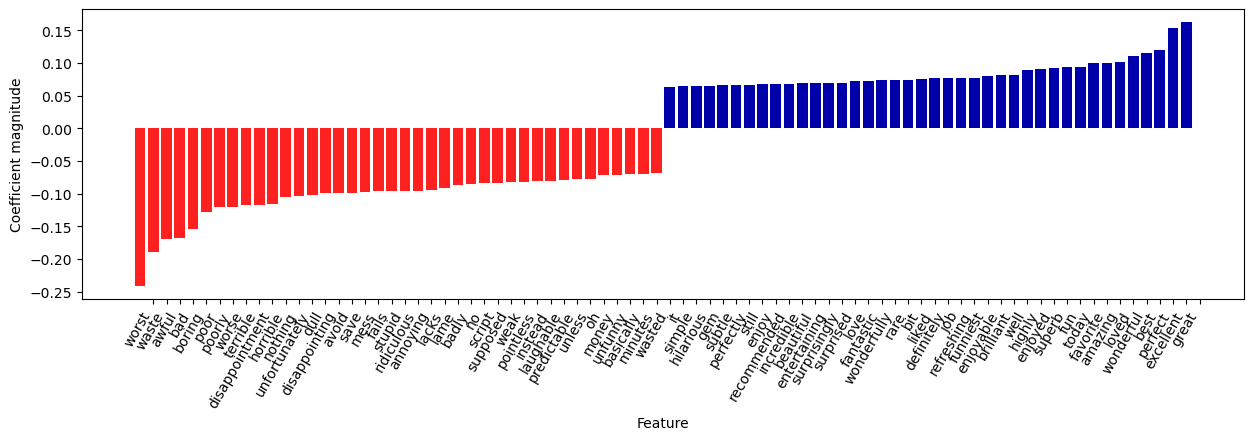

In [70]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps.logisticregression.coef_,
                                    grid.best_estimator_.named_steps.tfidfvectorizer.get_feature_names_out(),
                                    n_top_features=40);

The negative coefficients on the left belong to words that according to the model are indicative of negative reviews, while the positive coefficients on the right belong to words that according to the model indicate positive reviews. Most of the terms are quite intuitive, like "worst", "waste", "disappointment", and "laughable" indicat‐ ing bad movie reviews, while "excellent", "wonderful", "enjoyable", and "refreshing" indicate positive movie reviews. Some words are slightly less clear, like "bit", "job", and "today", but these might be part of phrases like “good job” or “best today.”

In [72]:
impact_val = 0.00001
low_impact_log = ((grid.best_estimator_.named_steps.logisticregression.coef_>=-1*impact_val) & 
              (grid.best_estimator_.named_steps.logisticregression.coef_<=impact_val));
idx = numpy.where(low_impact_log == 1);

low_impact_words = grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names_out()[idx[1]];
low_impact_words_weights = grid.best_estimator_.named_steps.logisticregression.coef_.ravel()[idx[1]];

n_words = low_impact_log.sum();

print(f"Number of low impact words with filter '{impact_val}' : {n_words}\n\n")
print(f"Low impact words: \n\n{low_impact_words}")
print(f" \n\nLow impact word weights: \n\n{low_impact_words_weights}")

Number of low impact words with filter '1e-05' : 36


Low impact words: 

['20th' 'alluding' 'apposite' 'brows' 'danza' 'dressing' 'emoting' 'gavin'
 'guinea' 'gummo' 'hogg' 'instruction' 'jaq' 'kleptomaniac' 'lau'
 'leftover' 'limbo' 'log' 'ludicrousness' 'nicholson' 'numerous'
 'operative' 'puritan' 'ridgemont' 'rotation' 'scottish' 'shiva' 'snot'
 'steadicam' 'stylings' 'technical' 'turf' 'vaughan' 'wilkes' 'withheld'
 'yesterday']
 

Low impact word weights: 

[ 6.34348391e-06  9.19855879e-06  3.66161773e-06 -7.11023721e-06
 -9.13414524e-06  2.96530470e-07 -9.91381991e-06  6.69611744e-06
  5.08074695e-06 -7.25672783e-06  3.33596379e-06 -7.07883140e-06
 -8.44008230e-07  2.42735552e-06  8.54626865e-06  4.33379540e-06
 -8.60572571e-06 -6.82045588e-06  8.99064278e-06  9.44794977e-07
  7.50071582e-06 -3.70140469e-06  4.58368857e-06 -6.01587680e-06
 -9.09363418e-07 -2.23923760e-08 -1.90527744e-06  2.25543478e-06
  1.86881843e-06 -2.92708606e-06 -1.17386088e-06  7.30126010e-06
  6.1743549

## Bag-of-Words with more than one word (n-Grams)

One of the main disadvantages of using a bag-of-words representation is that word order is completely discarded. Therefore, the two strings “it’s bad, not good at all” and “it’s good, not bad at all” have exactly the same representation, even though the mean‐ ings are inverted. Putting “not” in front of a word is only one example (if an extreme one) of how context matters. Fortunately, there is a way of capturing context when using a bag-of-words representation, by not only considering the counts of single tokens, but also the counts of pairs or triplets of tokens that appear next to each other. Pairs of tokens are known as bigrams, triplets of tokens are known as trigrams, and more generally sequences of tokens are known as n-grams. We can change the range of tokens that are considered as features by changing the ngram_range parameter of CountVectorizer or TfidfVectorizer. The ngram_range parameter is a tuple, consisting of the minimum length and the maximum length of the sequences of tokens that are considered. Here is an example on the toy data we used earlier

In [75]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


The default is to create one feature per sequence of tokens that is at least one token long and at most one token long, or in other words exactly one token long (single tokens are also called unigrams):

Using longer sequences of tokens usually results in many more features, and in more specific features. There is no common bigram between the two phrases in bard_words

In [78]:
ngram_vals = (1,3);

cv = sklearn.feature_extraction.text.TfidfVectorizer(ngram_range=ngram_vals).fit(bards_words);


print(f"Ngrams val: {ngram_vals}\n");
print("Vocabulary size: {}\n".format(len(cv.get_feature_names_out())));
print("Vocabulary : \n{}".format(cv.get_feature_names_out()));

Ngrams val: (1, 3)

Vocabulary size: 39

Vocabulary : 
['be' 'be fool' 'but' 'but the' 'but the wise' 'doth' 'doth think'
 'doth think he' 'fool' 'fool doth' 'fool doth think' 'he' 'he is'
 'he is wise' 'himself' 'himself to' 'himself to be' 'is' 'is wise'
 'knows' 'knows himself' 'knows himself to' 'man' 'man knows'
 'man knows himself' 'the' 'the fool' 'the fool doth' 'the wise'
 'the wise man' 'think' 'think he' 'think he is' 'to' 'to be' 'to be fool'
 'wise' 'wise man' 'wise man knows']


### Testing bigrams 

In [84]:
pipe =  sklearn.pipeline.make_pipeline(
        sklearn.feature_extraction.text.TfidfVectorizer(min_df=5),
        sklearn.linear_model.LogisticRegression(C=0.001, max_iter=1000, n_jobs=10));

param_grid = {"logisticregression__C" : numpy.logspace(-3,1,5),
              "tfidfvectorizer__ngram_range" : [(1,3), (1,2), (1,3), (1,4), (1,5)]};

In [86]:
t0 = time.time();
grid = sklearn.model_selection.GridSearchCV(pipe, param_grid=param_grid);
grid.fit(text_train, y_train);
t1 = time.time();

print(f"Estimated training time : {numpy.round(t1-t0, 2)} s");

Estimated training time : 873.97 s


In [88]:
print("Best cross-validation score: {:4.2f} %".format(100*grid.best_score_));
print("Best parameters:\n{}".format(grid.best_params_));

Best cross-validation score: 90.58 %
Best parameters:
{'logisticregression__C': 10.0, 'tfidfvectorizer__ngram_range': (1, 3)}


As you can see from the results, we improved performance by a bit more than a percent by adding bigram and trigram features. 

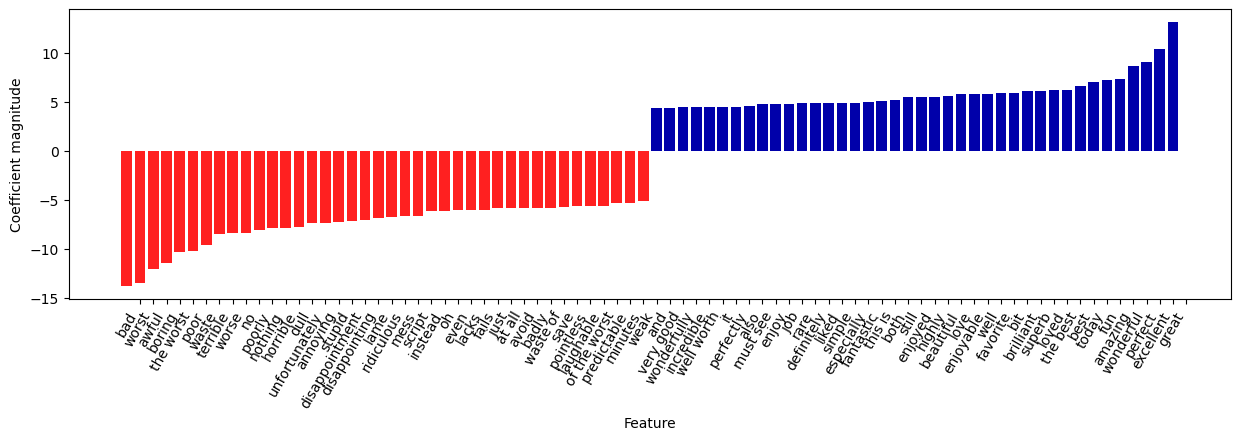

In [91]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer'];
fn = numpy.array(vect.get_feature_names_out());
coeff =  grid.best_estimator_.named_steps['logisticregression'].coef_;
mglearn.tools.visualize_coefficients(coeff, fn, n_top_features=40)

There are particularly interesting features containing the word “worth” that were not present in the unigram model: "not worth" is indicative of a negative review, while "definitely worth" and "well worth" are indicative of a positive review. This is a prime example of context influencing the meaning of the word “worth.

Next, we’ll visualize only trigrams, to provide further insight into why these features are helpful. Many of the useful bigrams and trigrams consist of common words that would not be informative on their own, as in the phrases "none of the", "the only good", "on and on", "this is one", "of the most", and so on. However, the impact of these features is quite limited compared to the importance of the unigram features

In [ ]:
# find 3-gram features
mask = numpy.array([len(feature.split(" ")) for feature in fn]) == 3;

mglearn.tools.visualize_coefficients(coeff.ravel()[mask], fn[mask], n_top_features=40);

## Advanced tokenization, stemming, and lemmatization 

In [173]:
# load spacy's English-language models
en_nlp = spacy.load("en_core_web_trf");

stemmer = nltk.stem.PorterStemmer();

B:\Anaconda\Lib\site-packages\thinc\shims\pytorch.py:261: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=device))


As mentioned previously, the feature extraction in the CountVectorizer and Tfidf Vectorizer is relatively simple, and much more elaborate methods are possible. One particular step that is often improved in more sophisticated text-processing applica‐ tions is the first step in the bag-of-words model: tokenization. This step defines what constitutes a word for the purpose of feature extraction.
 
We saw earlier that the vocabulary often contains singular and plural versions of some words, as in "drawback" and "drawbacks", "drawer" and "drawers", and "drawing" and "drawings". For the purposes of a bag-of-words model, the semantics of "drawback" and "drawbacks" are so close that distinguishing them will only increase overfitting, and not allow the model to fully exploit the training data. Simi‐ larly, we found the vocabulary includes words like "replace", "replaced", "replace ment", "replaces", and "replacing", which are different verb forms and a noun relating to the verb “to replace.” Similarly to having singular and plural forms of a noun, treating different verb forms and related words as distinct tokens is disadvanta‐ geous for building a model that generalizes well.


This problem can be overcome by representing each word using its word stem, which involves identifying (or conflating) all the words that have the same word stem. If this is done by using a rule-based heuristic, like dropping common suffixes, it is usually referred to as stemming. If instead a dictionary of known word forms is used (an explicit and human-verified system), and the role of the word in the sentence is taken into account, the process is referred to as lemmatization and the standardized form of the word is referred to as the lemma. Both processing methods, lemmatization and stemming, are forms of normalization that try to extract some normal form of a word. Another interesting case of normalization is spelling correction, which can be helpful in practice but is outside of the scope of this book.

To get a better understanding of normalization, let’s compare a method for stemming —the Porter stemmer, a widely used collection of heuristics (here imported from the nltk package)—to lemmatization as implemented in the spacy package. 

For details of the $\href{https://www.nltk.org/}{nltk}$ and $\href{https://spacy.io/}{spacy}$ documentation click the respective links.

In [207]:
# define function to compare lemmatization in spacy with stemming in nltk
def compare_normilisation(doc):
    # tokenize document in spacy
    doc_spacy = en_nlp(doc);
    # print lemmas found by spacy
    print("Lemmatization:")
    print([token.lemma_ for token in doc_spacy]);

    # print tokens found by Porter stemmer
    print("\nStemming:");
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy ]);

In [209]:
compare_normilisation(u"Our meeting today was worse than yesterday, " "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']

Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


Stemming is always restricted to trimming the word to a stem, so "was" becomes "wa", while lemmatization can retrieve the correct base verb form, "be". Similarly, lemmatization can normalize "worse" to "bad", while stemming produces "wors". Another major difference is that stemming reduces both occurrences of "meeting" to "meet". Using lemmatization, the first occurrence of "meeting" is recognized as a noun and left as is, while the second occurrence is recognized as a verb and reduced to "meet". In general, lemmatization is a much more involved process than stem‐ ming, but it usually produces better results than stemming when used for normaliz‐ ing tokens for machine learning. While scikit-learn implements neither form of normalization, CountVectorizer allows specifying your own tokenizer to convert each document into a list of tokens using the tokenizer parameter. We can use the lemmatization from spacy to create a callable that will take a string and produce a list of lemmas:

In [222]:
# Technicality: we want to use the regexp-based tokenizer
# that is used by CountVectorizer and only use the lemmatization
# from spacy. To this end, we replace en_nlp.tokenizer (the spacy tokenizer)
# with the regexp-based tokenization


# regexp used in CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')



en_nlp = spacy.load('en_core_web_trf')
old_tokenizer = en_nlp.tokenizer;

en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(regexp.findall(string))

In [250]:
# create a custom tokenizer using the spacy document processing pipeline
# (now using our own tokenizer)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document)
    return [token.lemma_ for token in doc_spacy];

# define a count vectorizer with the custom tokenizer
lemma_vect = sklearn.feature_extraction.text.CountVectorizer(tokenizer=custom_tokenizer, min_df=5);


In [252]:
X_train_lemma = lemma_vect.fit_transform(text_train)

AttributeError: 'spacy.tokenizer.Tokenizer' object has no attribute 'tokens_from_list'